## Indicadores escolhidos:
    População urbana x Emissão de gás metano
    Nas relações entre os indicadores, escolhi os seguintes países:
        América Latina: Brasil e Chile
        Europa Ocidental: França e Alemanha
        Ásia: China e India
        América do Norte: Estados Unidos e Canadá

## Testes de normalidade:
    População Urbana: Shapiro-Wilk
    Emissão de gás metano: Shapiro-Wilk

## Testes de correlação para o ano de 2020:
    População Urbana x Emissão de gás metano: Pearson

## Resultados:
    População Urbana x Emissão de gás metano: Pearson
        América Latina: nan
        Europa Ocidental: nan
        Ásia: nan
        América do Norte: nan

        

In [ ]:
import pandas as pd
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plt
import seaborn as sns

urban_population = pd.read_csv('data/API_SP.URB.TOTL_DS2_en_csv_v2_5874545.csv')
methane_emissions = pd.read_csv('data/API_EN.ATM.METH.ZG_DS2_en_csv_v2_5873422.csv')

def filter_by_country(df, country_list):
    return df[df['Country Name'].isin(country_list)]

country_list = ["United States", "Canada", "Brazil", "Chile", "China", "India", "Germany", "France"]

urban_population = filter_by_country(urban_population, country_list)
methane_emissions = filter_by_country(methane_emissions, country_list)

def plot_df(df, title, xlabel, ylabel, size1, size2):
    df = df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 67'], axis=1)
    df = df.dropna(axis=1, how='all')
    countries = df['Country Name'].unique()

    for country in countries:
        country_data = df[df['Country Name'] == country]
        country_data_values = country_data.iloc[:, 4:].values.flatten()
        years = country_data.columns[4:].astype(int)
        plt.plot(years, country_data_values, label=country)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    plt.figure(figsize=(size1,size2))



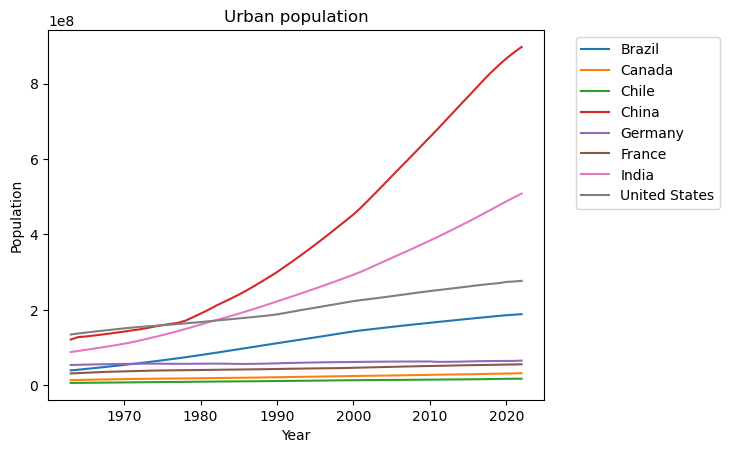

<Figure size 1500x500 with 0 Axes>

In [25]:
plot_df(urban_population, 'Urban population', 'Year', 'Population', 15, 5)

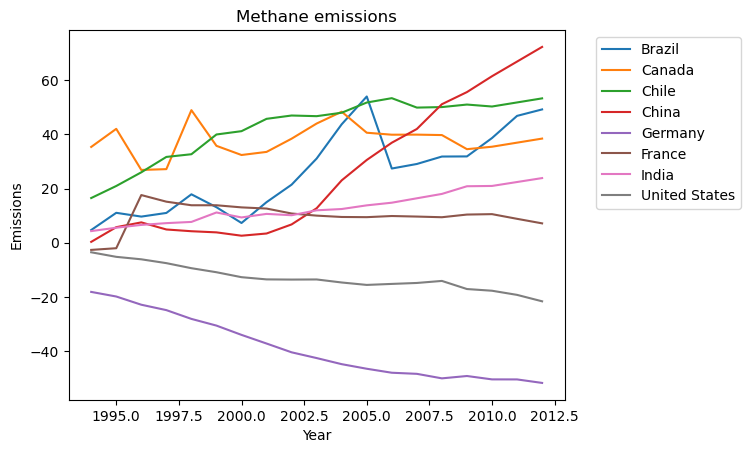

<Figure size 1500x500 with 0 Axes>

In [26]:
plot_df(methane_emissions, 'Methane emissions', 'Year', 'Emissions', 15, 5)


In [27]:
stat_shapiro, p_shapiro = shapiro(urban_population['2020'])
print(f'Teste de Shapiro-Wilk - Estatística: {stat_shapiro}, Valor-p: {p_shapiro}')

stat_shapiro, p_shapiro = shapiro(methane_emissions['2020'])
print(f'Teste de Shapiro-Wilk - Estatística: {stat_shapiro}, Valor-p: {p_shapiro}')

Teste de Shapiro-Wilk - Estatística: 0.8037834167480469, Valor-p: 0.03141872584819794
Teste de Shapiro-Wilk - Estatística: nan, Valor-p: 1.0


In [28]:
methane_emissions.dropna(inplace=True)
methane_emissions

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67


In [15]:
def pearson_correlation(df1, df2, year):
    col1 = df1[year]
    col2 = df2[year]
    return col1.corr(col2, method='pearson')

df_filter_forest = filter_by_country(urban_population, ["United States","Canada"])
df_filter_co2 = filter_by_country(methane_emissions, ["United States","Canada"])

print(f'Correlação de Pearson entre a população urbana e as emissões de metano em 2020: {pearson_correlation(df_filter_forest, df_filter_co2, "2015")}')

Correlação de Pearson entre a população urbana e as emissões de metano em 2020: nan
